#  The beta-binomial model of globe-tossing

##### Keywords: bayesian, conjugate prior, beta, binomial, beta-binomial, bayesian updating, loss function, decision theory, sampling as marginalization, plug-in approximation

In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Contents
{:.no_toc}
* 
{: toc}

## Formulation of the problem

This problem, taken from McElreath's book, involves a seal (or a well trained human) tossing a globe, catching it  on the nose, and noting down if the globe came down on  water or land.

The seal tells us that the first 9 samples were:

`WLWWWLWLW`.

We wish to understand the evolution of belief in the fraction of water on earth as the seal tosses the globe.

Suppose $\theta$ is the true fraction of  water covering the globe. Our data story if that $\theta$ then is the probability of the nose landing on water, with each throw or toss of the globe being independent.

Now we build a  probabilistic model for the problem, which we shall use to guide a process of **Bayesian updating** of the model as data comes in.

$$\cal{L} = p(n,k|\theta) = Binom(n,k, \theta)=\frac{n!}{k! (n-k)! } \, \theta^k \, (1-\theta)^{(n-k)} $$

Since our seal hasnt really seen any water or land, (strange, I know), it assigns equal probabilities, ie uniform probability to any value of $\theta$.

**This is our prior information**

For reasons of conjugacy we 
choose as prior the beta distribution, with $Beta(1,1)$ being the uniform prior.

## Choosing a prior and posterior

The  mean of $Beta(\alpha, \beta)$ is  $\mu = \frac{\alpha}{\alpha+\beta}$ while the variance is 

$$V=\mu (1- \mu)/(\alpha + \beta + 1)$$

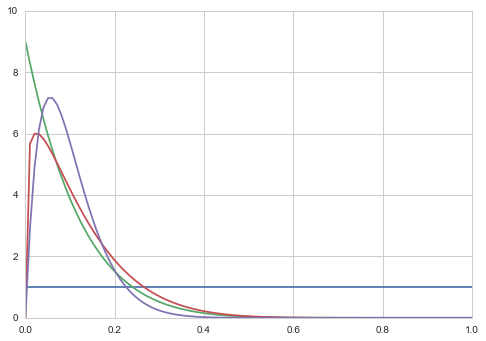

In [3]:
from scipy.stats import beta
x=np.linspace(0., 1., 100)
plt.plot(x, beta.pdf(x, 1, 1));
plt.plot(x, beta.pdf(x, 1, 9));
plt.plot(x, beta.pdf(x, 1.2, 9));
plt.plot(x, beta.pdf(x, 2, 18));

We shall choose $\alpha=1$ and $\beta=1$ to be uniform.

$$ p(\theta) = {\rm Beta}(\theta,\alpha, \beta) = \frac{\theta^{\alpha-1} (1-x)^{\beta-1} }{B(\alpha, \beta)} $$
where $B(\alpha, \beta)$ is independent of $\theta$ and it is the normalization factor.

From Bayes theorem, the posterior for $\theta$ is 

$$ p(\theta|D) \propto  p(\theta) \, p(n,k|\theta)  =  Binom(n,k, \theta) \,  {\rm Beta}(\theta,\alpha, \beta)  $$

which can be shown to be 

$${\rm Beta}(\theta, \alpha+k, \beta+n-k)$$

[1 0 1 1 1 0 1 0 1]


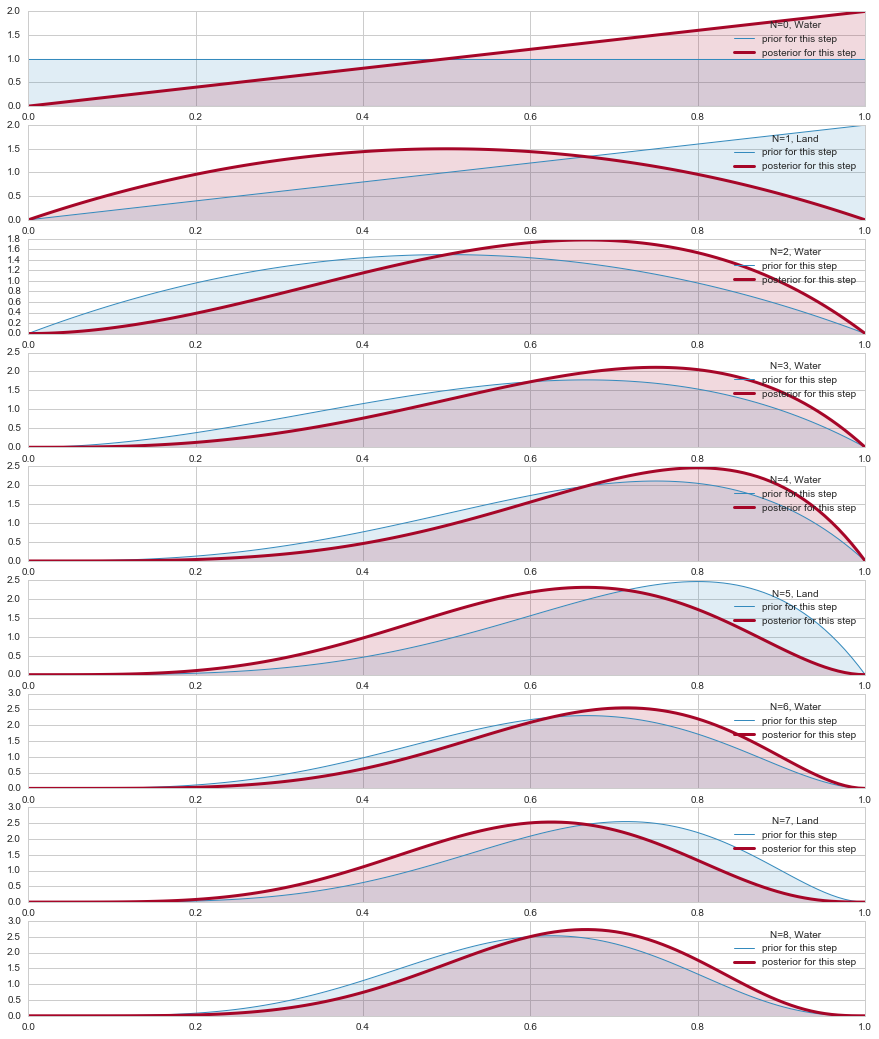

In [18]:
from scipy.stats import beta, binom

plt.figure(figsize=( 15, 18))

prior_params = np.array( [1.,1.] )  # FLAT 

x = np.linspace(0.00, 1, 125)
datastring = "WLWWWLWLW"
data=[]
for c in datastring:
    data.append(1*(c=='W'))
data=np.array(data)
print(data)
choices=['Land','Water']


for i,v in enumerate(data):
    plt.subplot(9,1,i+1)
    prior_pdf = beta.pdf( x, *prior_params)
    if v==1:
        water = [1,0]
    else:
        water = [0,1]
    posterior_params = prior_params + np.array( water )    # posteriors beta parameters
    posterior_pdf = beta.pdf( x, *posterior_params)  # the posterior 
    prior_params = posterior_params
    plt.plot( x,prior_pdf, label = r"prior for this step", lw =1, color ="#348ABD" )
    plt.plot( x, posterior_pdf, label = "posterior for this step", lw= 3, color ="#A60628" )
    plt.fill_between( x, 0, prior_pdf, color ="#348ABD", alpha = 0.15) 
    plt.fill_between( x, 0, posterior_pdf, color ="#A60628", alpha = 0.15) 
    
    plt.legend(title = "N=%d, %s"%(i, choices[v]));
    #plt.ylim( 0, 10)#

## Interrogating the posterior

Since we can sample from the posterior now after 9 observations, lets do so!

//anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


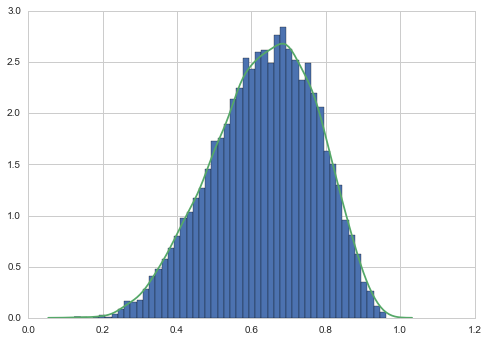

In [62]:
samples = beta.rvs(*posterior_params, size=10000)
plt.hist(samples, bins=50, normed=True);
sns.kdeplot(samples);

Now we can calculate all sorts of stuff.

The probability that the amount of water is less than 50%

In [27]:
np.mean(samples < 0.5)

0.17299999999999999

The probability by which we get 80% of the samples.

In [29]:
np.percentile(samples, 80)

0.76255263476156399

You might try and find a **credible interval**. This, unlike the wierd definition of confidence intervals, is exactly what you think it is, the amount of probability mass between certain percentages, like the middle 80%

In [31]:
np.percentile(samples, [10, 90])

array([ 0.44604094,  0.81516349])

You can make various point estimates: mean, median

In [33]:
np.mean(samples), np.median(samples), np.percentile(samples, 50) #last 2 are same

(0.63787343440335842, 0.6473143052303143, 0.6473143052303143)

A particularly important and useful point estimate is the **MAP**, or "maximum a-posteriori" estimate, the value of the parameter at which the pdf (num-samples) reach a maximum.

In [58]:
sampleshisto = np.histogram(samples, bins=50)

(array([  2,   3,   4,   7,  13,   9,  23,  27,  37,  53,  58,  57,  74,
         94, 124, 152, 170, 216, 215, 224, 224, 269, 310, 308, 341, 335,
        371, 405, 434, 419, 455, 474, 407, 427, 425, 380, 360, 332, 307,
        297, 262, 202, 194, 152, 138,  90,  55,  35,  23,   7]),
 array([ 0.1684931 ,  0.18443135,  0.20036959,  0.21630783,  0.23224608,
         0.24818432,  0.26412256,  0.2800608 ,  0.29599905,  0.31193729,
         0.32787553,  0.34381378,  0.35975202,  0.37569026,  0.39162851,
         0.40756675,  0.42350499,  0.43944324,  0.45538148,  0.47131972,
         0.48725797,  0.50319621,  0.51913445,  0.5350727 ,  0.55101094,
         0.56694918,  0.58288743,  0.59882567,  0.61476391,  0.63070215,
         0.6466404 ,  0.66257864,  0.67851688,  0.69445513,  0.71039337,
         0.72633161,  0.74226986,  0.7582081 ,  0.77414634,  0.79008459,
         0.80602283,  0.82196107,  0.83789932,  0.85383756,  0.8697758 ,
         0.88571405,  0.90165229,  0.91759053,  0.93352878,

In [63]:
maxcountindex = np.argmax(sampleshisto[0])
mapvalue = sampleshisto[1][maxcountindex]
print(maxcountindex, mapvalue)

31 0.662578641304


A principled way to get these point estimates is a **loss function**. This is the subject of decision theory, and we shall come to it soon. Different losses correspond to different well known point estimates, as we shall see.

But as a quick idea of this,  consider the squared error decision loss:

$$R(t) = E_{p(\theta \vert D)}[(\theta -t)^2] = \int d\theta  (\theta -t)^2  p(\theta \vert D)$$

$$\frac{dR(t)}{dt} = 0 \implies  \int  d\theta -2(\theta -t)p(\theta \vert D) = 0$$

or 

$$ t= \int d\theta \theta\,p(\theta \vert D) $$

or the mean of the posterior.

We can see this with some quick computation:

Mean 0.634941511888


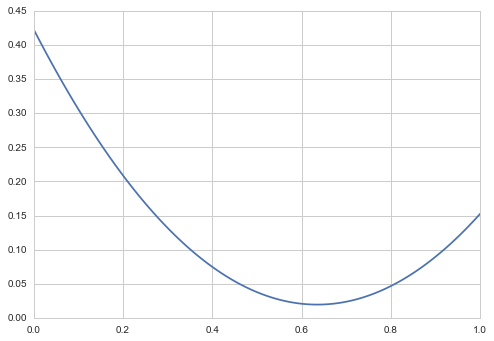

In [64]:
mse = [np.mean((xi-samples)**2) for xi in x]
plt.plot(x, mse);
print("Mean",np.mean(samples));

## Obtaining the posterior predictive

Its easy to sample from any one probability to get the sampling distribution at a particular $\theta$

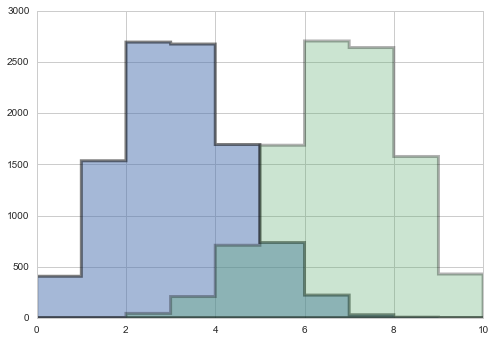

In [52]:
point3samps = np.random.binomial( len(data), 0.3, size=10000);
point7samps = np.random.binomial( len(data), 0.7, size=10000);
plt.hist(point3samps, lw=3, alpha=0.5, histtype="stepfilled", bins=np.arange(11));
plt.hist(point7samps, lw=3, alpha=0.3,histtype="stepfilled", bins=np.arange(11));

The posterior predictive:

$$p(y^{*} \vert D) = \int d\theta p(y^{*} \vert \theta) p(\theta \vert D)$$

seems to be a complex integral.  But if you parse it, its not so complex. This diagram from McElreath helps:

![](images/postpred.png)

A similar risk-minimization holds for the posterior-predictive  so that

$$y_{min mse} = \int  dy \, y \, p(y \vert D)$$

which is indeed what we  would use in a regression scenario...


### Plug-in Approximation

Also, often, people will use the **plug-in approximation** by putting the posterior mean or MAP value 

$$p(\theta \vert D) = \delta(\theta - \theta_{MAP})$$

and then simply  drawing the posterior predictive  from :

$$p(y^{*} \vert D) = p(y^{*} \vert \theta_{MAP})$$

(the same thing could be done for $\theta_{mean}$).

In [65]:
pluginpreds = np.random.binomial( len(data), mapvalue, size = len(samples))

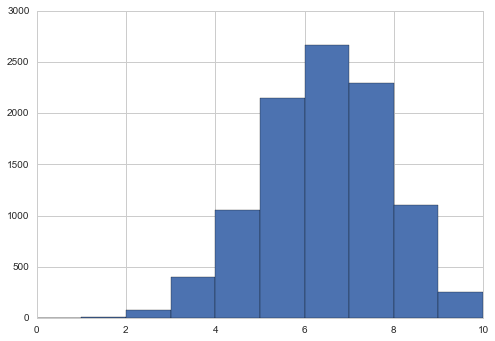

In [68]:
plt.hist(pluginpreds, bins=np.arange(11));

This approximation is just sampling from the likelihood(sampling distribution), at a posterior-obtained value of $\theta$.  It might be useful if the posterior is an expensive MCMC and the MAP is easier to find by optimization, and can be used in conjunction with quadratic (gaussian) approximations to the posterior, as we will see in variational inference. But for now we have all the samples, and it would be inane not to use them...

### The posterior predictive from sampling

But really from the perspective of sampling, all we have to do is to first draw the thetas from the posterior, then draw y's from the likelihood, and histogram the likelihood. This is the same logic as marginal posteriors, with the addition of the fact that we must draw  y from the likelihood once we drew $\theta$. You might think that we have to draw multiple $y$s at a theta, but this is already taken care of for us because of the nature of sampling. We already have multiple $\theta$a in a bin.

In [34]:
postpred = np.random.binomial( len(data), samples);

In [53]:
postpred

array([5, 5, 7, ..., 7, 5, 8])

In [35]:
samples.shape, postpred.shape

((10000,), (10000,))

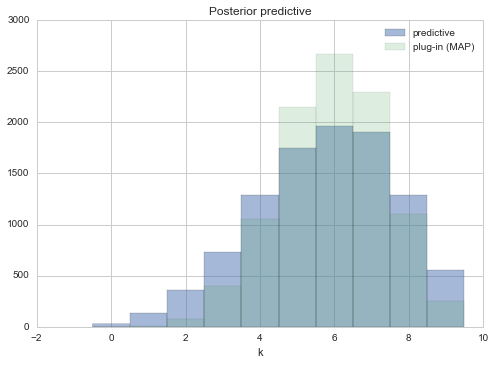

In [67]:
plt.hist(postpred, bins=np.arange(11), alpha=0.5, align="left", label="predictive")
plt.hist(pluginpreds, bins=np.arange(11), alpha=0.2, align="left", label="plug-in (MAP)")
plt.title('Posterior predictive')
plt.xlabel('k')
plt.legend()

You can interrogate the posterior-predictive, or **simulated** samples in other ways, asking about the longest run of water tosses, or the number of times the water/land switched. This is left as an exercise. In particular, you will find that the number of switches is not consistent with what you see in our data. This might lead you to question our model...always a good thing..but note that we have very little data as yet to go on